In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, shapiro, kstest, levene, mannwhitneyu
from statsmodels.formula.api import ols

__Data__: This dataset includes all orders in 2017, together with gender information.  
__Question__: Is there a difference in the average order value between gender 0 and gender 1? Is the difference statistically significant?

In [13]:
df = pd.read_csv('../../data/orders_2017.csv', parse_dates=['date'])
df.shape

(13471, 4)

In [15]:
df.head()

,customer_id,gender,date,value
0,1000,0,2017-01-01 00:11:31,198.5
1,1001,0,2017-01-01 00:29:56,338.0
2,1002,1,2017-01-01 01:30:31,733.0
3,1003,1,2017-01-01 01:34:22,772.0
4,1004,0,2017-01-01 03:11:54,508.0


In [16]:
df.tail()

,customer_id,gender,date,value
13466,9810,1,2017-12-31 22:16:20,794.44
13467,9811,1,2017-12-31 22:24:06,148.60
13468,9812,0,2017-12-31 23:01:10,153.00
13469,9813,0,2017-12-31 23:11:02,534.00
13470,8658,0,2017-12-31 23:35:09,306.60


In [7]:
mean_0 = df.loc[df.gender==0,'value'].mean()
mean_1 = df.loc[df.gender==1,'value'].mean()
mean_0, mean_1, mean_0-mean_1

(363.89000591803506, 350.70836114422, 13.181644773815037)

*Note: I simply took the mean order value for each gender. If we want to calculate an average based on individuals, we might want to sum up the order value by customer first, then taking the mean.*

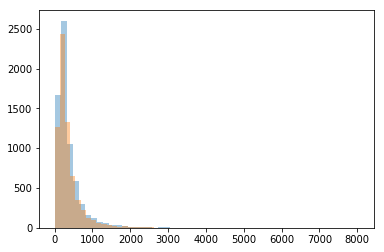

In [8]:
df.groupby('gender').value.hist(alpha=.4, bins=50)
plt.grid(b=None)
plt.show()

As the average order value of gender 0 is 13.18 higher than the average order of gender 1, we want to know whether the difference is *statistically significant*, and if it is, whether the difference is *practically significant*. To answer the former, we can perform some statistical tests; to answer the latter (only when the difference is indeed statistically significant), we need to communicate with the business to evaluate potential actions.

We can perform **independent-samples t-test** using *scipy.stats.ttest_ind* to compare two values. This parametric test requires *independece, normality and homoscedasticity assumptions*. The first assumption is related to experiment design, thus independent of our measures. The last two assumptions **apply to the residuals** (not the variable) and we will check them as described below.
- **Normality**: We can simply look at histograms for a quick check. Then, two popular tests for normality are the Shapiro-Wilk test and the Kolmogorov-Smirnov (KS) test. In *scipy.stats.shapiro*, with N > 5000 the p-value may not be accurate. Therefore, I will use *scipy.stats.kstest*  

- **Homoscedasticity**: We can perform Levene's test using *scipy.stats.levene*

In [9]:
m = ols("value ~ C(gender)", data=df).fit()

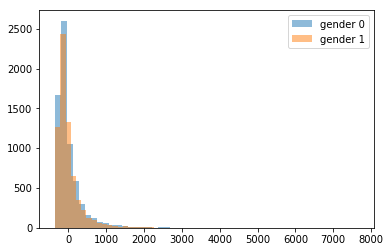

In [10]:
m.resid[df.gender==0].hist(alpha=.5, bins=50, label="gender 0")
m.resid[df.gender==1].hist(alpha=.5, bins=50, label="gender 1")
plt.legend(loc='upper right')
plt.grid(b=None)
plt.show()

In [11]:
kstest(m.resid[df.gender==0], 'norm')

KstestResult(statistic=0.6800800758860057, pvalue=0.0)

In [12]:
kstest(m.resid[df.gender==1], 'norm')

KstestResult(statistic=0.6777239640790845, pvalue=0.0)

By looking at the histograms and the KS test's p-values, we can see that the normality assumption is violated. One solution is to take the log of the order value and check the assumptions again. However, we can also perform a nonparametric test called the **Mann-Whitney U test**.

In [13]:
mannwhitneyu(df.value[df.gender == 0], df.value[df.gender == 1])

MannwhitneyuResult(statistic=22451444.5, pvalue=0.15220525508505944)

p-value >.05 means we could not detect any significant difference with the data we have (with alpha = 0.05). In other words, we conclude that the difference between the average order values for gender 0 and gender 1 are **not statistically significant.**